## TODO
- Explain how ASPV fails to prevent all leaks in experiment 2
- Verify that edge defense metrics are correct (controller.py:47)
- Change out data source for CAIDA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import controller

BASE_SCENARIO = './ca_gb/ca_gb_cleaned_ranked.lotus'

# Vary ASPA and ASPV

In [3]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
results_1 = controller.main(BASE_SCENARIO+".pickle", all_asns, "aspa_random", verbose=False, iterations=100, usr_seed=0.6910112699394626)
results_1

array([[0.        , 0.07136491, 0.19016955, 0.33735743, 0.69279151],
       [0.        , 0.15008791, 0.25878381, 0.43232675, 0.7033152 ],
       [0.        , 0.13929272, 0.25664836, 0.41980295, 0.70350388],
       [0.        , 0.12399985, 0.23212006, 0.41130064, 0.71633333],
       [0.        , 0.17337666, 0.28632272, 0.41602629, 0.75      ]])

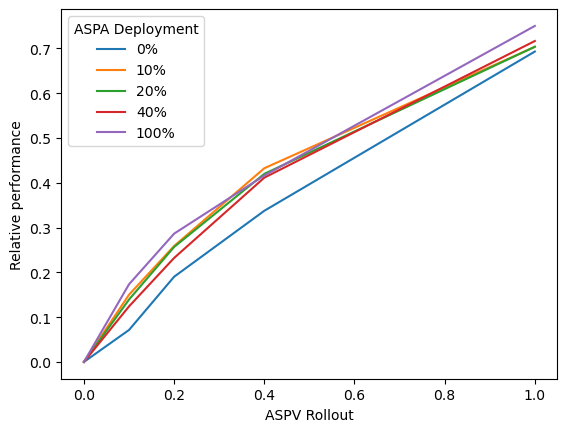

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
labels=[0.0, 0.1, 0.2, 0.4, 1.0]
df = pd.DataFrame(results_1, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA Deployment")
plt.ylabel("Relative performance")
plt.xlabel("ASPV Rollout")
plt.show()

In [5]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
results_2 = controller.main(BASE_SCENARIO+".pickle", all_asns, "aspa_random", verbose=False, iterations=100, usr_seed=0.6910112699394626, aspv_level=2)
results_2

array([[0.        , 0.01      , 0.01      , 0.01      , 0.01      ],
       [0.        , 0.00117647, 0.00220588, 0.01      , 0.01      ],
       [0.        , 0.00117647, 0.00397059, 0.01      , 0.01      ],
       [0.        , 0.00176471, 0.0025    , 0.01      , 0.01      ],
       [0.        , 0.00088235, 0.01      , 0.01      , 0.01      ]])

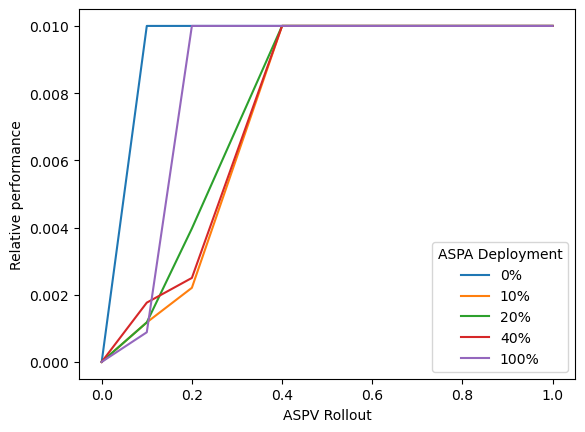

In [6]:
labels=[0.0, 0.1, 0.2, 0.4, 1.0]
df = pd.DataFrame(results_2, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA Deployment")
plt.ylabel("Relative performance")
plt.xlabel("ASPV Rollout")
plt.show()

## Random Deployment

In [7]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df = controller.main(BASE_SCENARIO+".pickle", all_asns, "protect_random", verbose=False)

0.21353065590886433
         0.0         0.1         0.2         0.3         0.4         0.5  \
count  100.0  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.0    0.041465    0.123375    0.219949    0.277769    0.328875   
std      0.0    0.153789    0.268857    0.366214    0.401293    0.419389   
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.0    0.000000    0.000000    0.000000    0.000000    0.045973   
75%      0.0    0.006661    0.106250    0.267460    0.429545    0.841707   
max      0.0    1.000000    1.000000    1.000000    1.000000    1.000000   

              0.6         0.7         0.8         0.9         1.0  
count  100.000000  100.000000  100.000000  100.000000  100.000000  
mean     0.394438    0.456206    0.480351    0.565608    0.618667  
std      0.444382    0.463386    0.473981    0.475013    0.477353  
min      0.000000    0.

<AxesSubplot: xlabel='Global ASPV Deployment', ylabel='Avg. Improvement'>

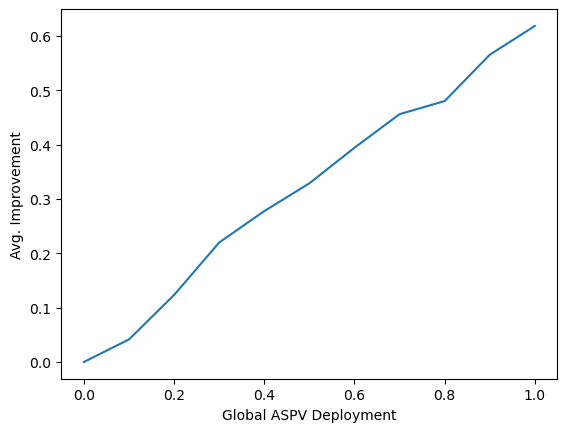

In [8]:
m = df.mean()
m.columns = ["ASPV Deployment Rate", "Avg. Improvement"]
m.plot(x="ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPV Deployment", ylabel="Avg. Improvement")

## Deployment at Edge of AS Network

In [ ]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df = controller.main(BASE_SCENARIO+".pickle", all_asns, "international_edge_defense", verbose=False)

In [ ]:
m = df.mean()
m.columns = ["ASPV Deployment Rate", "Avg. Improvement"]
m.plot(x="ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPV Deployment Rate", ylabel="Avg. Improvement")